**Clustering considering Principal Component Analysis:**

In [ ]:
import pandas as pd

In [3]:
CarPricesData=pd.read_pickle('D:\Hashir\Python\Python Dataset\PKL files\CarPricesDataNumeric.pkl')

In [4]:
BostonHousingData=pd.read_pickle('D:\Hashir\Python\Python Dataset\PKL files\BostonHousingDataNumeric.pkl')

In [5]:
BikeRentData=pd.read_pickle('D:\Hashir\Python\Python Dataset\PKL files\BikeRentDataNumeric.pkl')

In [6]:
ConcreteStrengthData=pd.read_pickle('D:\Hashir\Python\Python Dataset\PKL files\ConcreteStrengthDataNumeric.pkl')

In [7]:
ComputerPricesData=pd.read_pickle('D:\Hashir\Python\Python Dataset\PKL files\ComputerPricesDataNumeric.pkl')

In [8]:
DiamondPricesData=pd.read_pickle('D:\Hashir\Python\Python Dataset\PKL files\DiamondPricesDataNumeric.pkl')

In [9]:
ZomatoData=pd.read_pickle('D:\Hashir\Python\Python Dataset\PKL files\ZomatoDataNumeric.pkl')

In [10]:
TitanicSurvivalData=pd.read_pickle('D:\Hashir\Python\Python Dataset\PKL files\TitanicSurvivalDataNumeric.pkl')

In [11]:
IrisData=pd.read_pickle('D:\Hashir\Python\Python Dataset\PKL files\IrisDataNumeric.pkl')

In [12]:
CreditRiskData=pd.read_pickle('D:\Hashir\Python\Python Dataset\PKL files\CreditRiskDataNumeric.pkl')

In [13]:
SalaryData=pd.read_pickle('D:\Hashir\Python\Python Dataset\PKL files\SalaryDataNumeric.pkl')

In [14]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from termcolor import colored
from sklearn.metrics import silhouette_score

In [15]:
def FindPrincipleComponents(inpData,TargetVariable):
    TargetVariableData=inpData[TargetVariable]
    OnlyPredictors=inpData.drop(TargetVariable,axis=1)
    X=OnlyPredictors.values
    y=TargetVariableData.values
    pca = PCA(n_components=OnlyPredictors.columns.size)
    # fitting the data
    pca_fit=pca.fit(X)
    # calculating the principal components
    reduced_X = pca_fit.transform(X)
    # The Amount of variance explained by each principle componnent
    #var_explained= pca.explained_variance_ratio_
    #print(np.round(var_explained,2))
    #Cumulative Variance explained by each component
    var_explained_cumulative=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
    print(var_explained_cumulative)
    plt.plot( range(1,OnlyPredictors.columns.size+1), var_explained_cumulative )
    plt.xlabel('Number of components')
    plt.ylabel('% Variance explained')
    count=1
    for i in range (OnlyPredictors.columns.size-1):
        if(var_explained_cumulative[i+1]-var_explained_cumulative[i]>0.1):
            count+=1
    print(colored('The predictors in this data can be represented by','red'),
          colored(count,'red'),colored(' principal components','red'))
    # Choosing count-principal components
    pca1 = PCA(n_components=count)
    # fitting the data
    pca_fit=pca1.fit(X)
    # calculating the principal components
    reduced_X_new = pca_fit.transform(X)
    cols=[]
    for i in range(count):
        cols.append('PC'+str(i+1))
    ReducedData=pd.DataFrame(np.round(reduced_X_new,3), columns=cols)
    ReducedData[TargetVariable]=TargetVariableData
    print(ReducedData)
    # Defining the list of clusters to try
    n_clusters_list=np.arange(start=2, stop=10, step=1)

    # Creating empty data frame to store the silhouette scores for each trials
    silhouette_scores_data=pd.DataFrame()

    for n_clusters_trial in n_clusters_list:
        # Generating Hierarchical clusters
        from sklearn.cluster import AgglomerativeClustering
        hc = AgglomerativeClustering(n_clusters=n_clusters_trial, affinity = 'euclidean', linkage = 'ward')
        
        if(len(np.unique(hc.fit_predict(reduced_X_new)))>1):
            sil_score=silhouette_score(X, hc.fit_predict(reduced_X_new))
        else:
            continue
    
        # Appending the result of each iteration
        silhouette_scores_data=silhouette_scores_data.append(pd.DataFrame(data=[[sil_score,n_clusters_trial]], 
                                                                          columns=["Score", "Clusters"]))
    # Finding out the best nmber of clusters with highest Score
    print(silhouette_scores_data.sort_values(by='Score', ascending=False).head(1))

[80.58 96.89 99.02 99.72 99.85 99.92 99.96 99.98 99.99 99.99 99.99 99.99
 99.99]
The predictors in this data can be represented by 5  principal components
         PC1     PC2     PC3     PC4    PC5  MEDV
0   -119.819  -5.560  -3.173   5.292 -1.819  24.0
1   -168.890  10.116 -30.782   1.297  0.370  21.6
2   -169.312  14.081 -16.754 -10.278 -0.093  34.7
3   -190.231  18.302  -6.534 -19.645  1.513  33.4
4   -190.133  16.098 -13.159 -14.178  1.761  36.2
..       ...     ...     ...     ...    ...   ...
501 -138.698   5.781 -20.978  -5.707 -0.481  22.4
502 -139.504   1.039 -26.794  -0.879 -0.898  20.6
503 -138.387   0.938 -37.285   8.074 -2.369  23.9
504 -137.505   4.252 -35.988   7.016 -2.103  22.0
505 -139.190   1.009 -29.772   1.677 -1.369  11.9

[506 rows x 6 columns]
      Score  Clusters
0  0.720864         3


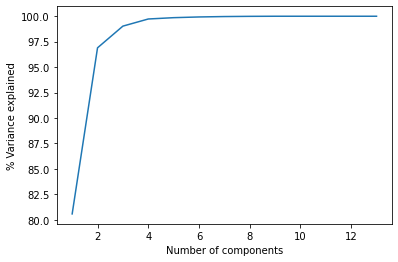

In [28]:
FindPrincipleComponents(BostonHousingData,'MEDV')

[ 99.92 100.   100.   100.   100.   100.   100.   100.   100.   100.
 100.   100.   100.   100.  ]
The predictors in this data can be represented by 1  principal components
            PC1  cnt
0      8689.885   16
1      8688.723   40
2      8687.766   32
3      8686.911   13
4      8685.988    1
...         ...  ...
17374 -8684.296  119
17375 -8685.066   89
17376 -8686.083   90
17377 -8686.785   61
17378 -8687.692   49

[17379 rows x 2 columns]
      Score  Clusters
0  0.621598         2


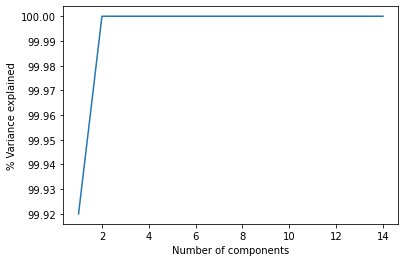

In [29]:
FindPrincipleComponents(BikeRentData,'cnt')

[100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]
The predictors in this data can be represented by 1  principal components
            PC1    Price
0    -21749.736  13500.0
1      4201.230  13750.0
2    -27024.729  13950.0
3    -20735.737  14950.0
4    -30235.724  13750.0
...         ...      ...
1423 -48192.799   7950.0
1424 -49736.796   7750.0
1425 -51720.794   7950.0
1426 -51820.794   9950.0
1427 -68735.298   8950.0

[1428 rows x 2 columns]
      Score  Clusters
0  0.590453         2


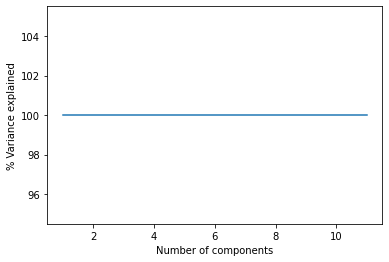

In [30]:
FindPrincipleComponents(CarPricesData,'Price')

[ 92.56  99.41  99.94  99.99 100.   100.   100.   100.   100.   100.
 100.   100.  ]
The predictors in this data can be represented by 3  principal components
          PC1      PC2     PC3   price
0    -323.810  159.797 -22.771  1499.0
1    -318.628  159.532 -14.916  1795.0
2    -234.344  150.574 -25.337  1595.0
3    -234.278  150.541 -25.414  1849.0
4     -64.906  133.287 -22.448  3295.0
...       ...      ...     ...     ...
6178  130.085  171.182  40.055  2744.0
6179  449.267  137.133  -3.117  1545.0
6180  798.367  102.184  20.583  2190.0
6181  450.310  138.117  30.721  1590.0
6182  450.312  138.117  30.731  2844.0

[6183 rows x 4 columns]
      Score  Clusters
0  0.651109         2


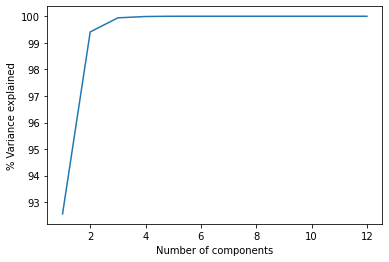

In [31]:
FindPrincipleComponents(ComputerPricesData,'price')

[ 32.95  57.85  75.73  86.61  96.86  99.79  99.98 100.01]
The predictors in this data can be represented by 7  principal components
          PC1      PC2      PC3      PC4      PC5     PC6     PC7  Strength
0     288.968    5.027  -57.625   -9.993  -59.816 -18.326  -8.544     79.99
1     289.363    1.307  -69.552  -16.546  -61.360 -22.229  -5.753     61.89
2     100.880  195.665  -71.515   70.166  196.183   8.398  -1.875     40.27
3     110.537  203.713  -81.375   75.577  287.128 -13.269  -1.896     41.05
4     -57.064   58.967  -13.468  -60.768  317.700 -56.434   5.354     44.30
...       ...      ...      ...      ...      ...     ...     ...       ...
1000  -26.574   49.038   83.497   62.992  -16.324  -6.098  -3.660     44.61
1001   32.534  -52.663  147.461  104.361   -0.525  29.977   0.689     53.52
1002 -153.954   43.965   48.866   57.595   -1.420  12.204   0.449     57.22
1003 -134.272   83.937  -10.656  -77.119   -7.343   4.359 -12.972     65.91
1004  -31.574   46.565   80.197 

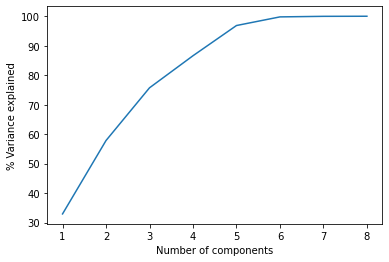

In [32]:
FindPrincipleComponents(ConcreteStrengthData,'Strength')

[ 32.87  55.61  72.33  83.98  95.21  99.94  99.99 100.   100.  ]
The predictors in this data can be represented by 6  principal components
         PC1    PC2    PC3    PC4    PC5    PC6   price
0     -3.163  1.351  1.830  0.389 -1.351  0.122   326.0
1      2.559  3.717  2.197  1.158 -2.308 -0.847   326.0
2      6.410  6.460  0.399  0.980 -1.733  2.550   327.0
3     -0.458  0.729 -2.231  2.460 -1.119 -1.436   334.0
4      0.001 -1.079 -0.967  4.445 -0.426  0.877   335.0
...      ...    ...    ...    ...    ...    ...     ...
53789 -0.189  0.703  2.892 -1.415 -0.588  0.182  2729.0
53790 -2.410 -0.694  3.351 -0.319  1.385  1.238  2729.0
53791  1.967  1.301  3.116  0.570  1.620 -0.198  2730.0
53792  1.200 -0.994 -0.427 -0.061 -1.472 -0.802  2730.0
53793 -2.373 -0.090  2.310 -1.597  0.470 -0.149  2730.0

[53794 rows x 7 columns]


MemoryError: Unable to allocate 1.35 GiB for an array with shape (1446870321,) and data type bool

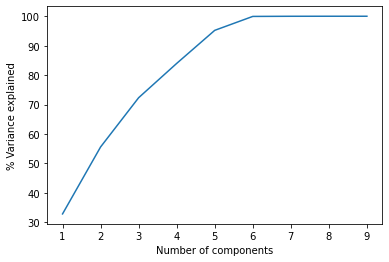

In [33]:
FindPrincipleComponents(DiamondPricesData,'price')

[ 71.83 100.   100.   100.   100.   100.   100.   100.   100.   100.  ]
The predictors in this data can be represented by 2  principal components
           PC1      PC2  Rating
0      554.170    8.930     4.8
1      727.320  247.149     4.5
2     3327.315 -840.539     4.4
3      952.558  -53.424     4.9
4      914.703 -184.050     4.8
...        ...      ...     ...
9502  -293.584  748.113     4.0
9503  -201.098  977.432     3.5
9504  -242.489  601.080     4.0
9505  -223.710  845.513     4.5
9506  -372.431  565.856     3.8

[9507 rows x 3 columns]


MemoryError: unable to allocate array data.

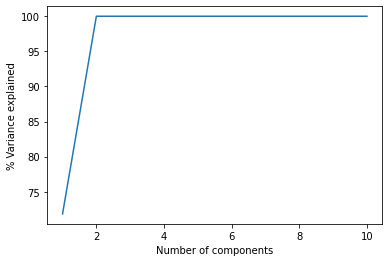

In [16]:
FindPrincipleComponents(ZomatoData,'Rating')

[90.69 99.87 99.93 99.95 99.97 99.98 99.99 99.99 99.99]
The predictors in this data can be represented by 2  principal components
        PC1     PC2  Survived
0   -24.363  -6.906         0
1    40.188   6.986         1
2   -23.559  -2.916         1
3    21.913   4.590         1
4   -23.138   6.075         0
..      ...     ...       ...
886 -18.445  -2.067         0
887  -1.706 -10.611         1
888  -8.146  -6.969         0
889  -1.473  -3.614         1
890 -23.536   3.089         0

[891 rows x 3 columns]
      Score  Clusters
0  0.664081         2


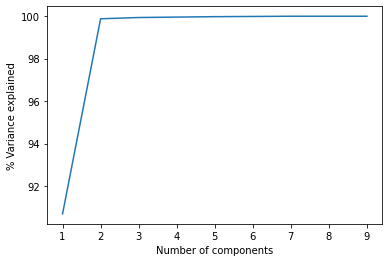

In [17]:
FindPrincipleComponents(TitanicSurvivalData,'Survived')

[100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100.]
The predictors in this data can be represented by 1  principal components
          PC1  GoodCredit
0   -2102.286           0
1    2679.803           1
2   -1175.276           0
3    4610.783           0
4    1598.747           1
..        ...         ...
995 -1535.277           0
996   585.765           0
997 -2467.273           0
998 -1426.190           1
999  1304.800           0

[1000 rows x 2 columns]
      Score  Clusters
0  0.626416         3


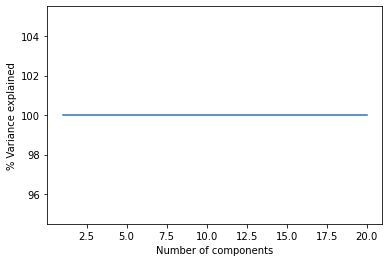

In [18]:
FindPrincipleComponents(CreditRiskData,'GoodCredit')

[ 92.5   97.78  99.48 100.  ]
The predictors in this data can be represented by 4  principal components
       PC1    PC2    PC3    PC4  Species
0   -2.674  0.319 -0.030 -0.002      1.0
1   -2.705 -0.179 -0.209 -0.099      1.0
2   -2.880 -0.145  0.019 -0.020      1.0
3   -2.736 -0.318  0.034  0.076      1.0
4   -2.719  0.327  0.088  0.061      1.0
..     ...    ...    ...    ...      ...
144  1.954  0.182  0.180 -0.426      3.0
145  1.536 -0.382 -0.116 -0.254      3.0
146  1.774  0.073  0.133 -0.137      3.0
147  1.910  0.115  0.726 -0.044      3.0
148  1.399 -0.286  0.368  0.155      3.0

[149 rows x 5 columns]
      Score  Clusters
0  0.686073         2


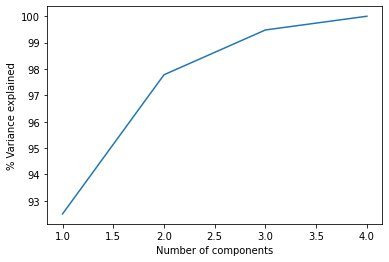

In [19]:
FindPrincipleComponents(IrisData,'Species')

[ 98.86 100.   100.   100.   100.   100.   100.   100.   100.  ]
The predictors in this data can be represented by 2  principal components
             PC1     PC2  SalaryGT50K
0       1389.170 -80.520          0.0
1       -784.807 -91.259          0.0
2       -784.804 -91.239          0.0
3       -784.798 -91.208          0.0
4       -784.808 -91.258          0.0
...          ...     ...          ...
32532   -784.809 -91.266          1.0
32533   -784.804 -91.236          1.0
32534   -784.796 -91.196          0.0
32535   -784.816 -91.308          0.0
32536  14239.017 -17.169          1.0

[32537 rows x 3 columns]


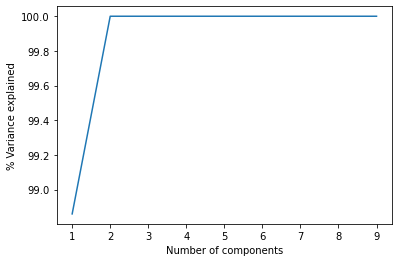

In [31]:
FindPrincipleComponents(SalaryData,'SalaryGT50K')

<font color=red>Salary Data, DiamondPricesData and ZomatoData are big enough that the above codeis not working for them</font>

In [22]:
def FindPrincipleComponents(inpData,TargetVariable):
    TargetVariableData=inpData[TargetVariable]
    OnlyPredictors=inpData.drop(TargetVariable,axis=1)
    X=OnlyPredictors.values
    y=TargetVariableData.values
    pca = PCA(n_components=OnlyPredictors.columns.size)
    # fitting the data
    pca_fit=pca.fit(X)
    # calculating the principal components
    reduced_X = pca_fit.transform(X)
    # The Amount of variance explained by each principle componnent
    #var_explained= pca.explained_variance_ratio_
    #print(np.round(var_explained,2))
    #Cumulative Variance explained by each component
    var_explained_cumulative=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
    print(var_explained_cumulative)
    plt.plot( range(1,OnlyPredictors.columns.size+1), var_explained_cumulative )
    plt.xlabel('Number of components')
    plt.ylabel('% Variance explained')
    count=1
    for i in range (OnlyPredictors.columns.size-1):
        if(var_explained_cumulative[i+1]-var_explained_cumulative[i]>0.1):
            count+=1
    print(colored('The predictors in this data can be represented by','red'),
          colored(count,'red'),colored(' principal components','red'))
    # Choosing count-principal components
    count=2
    pca1 = PCA(n_components=count)
    # fitting the data
    pca_fit=pca1.fit(X)
    # calculating the principal components
    reduced_X_new = pca_fit.transform(X)
    cols=[]
    for i in range(count):
        cols.append('PC'+str(i+1))
    ReducedData=pd.DataFrame(np.round(reduced_X_new,3), columns=cols)
    ReducedData[TargetVariable]=TargetVariableData
    print(ReducedData)
    # Defining the list of clusters to try
    n_clusters_list=np.arange(start=2, stop=5, step=1)

    # Creating empty data frame to store the silhouette scores for each trials
    silhouette_scores_data=pd.DataFrame()

    for n_clusters_trial in n_clusters_list:
        # Generating Hierarchical clusters
        from sklearn.cluster import AgglomerativeClustering
        hc = AgglomerativeClustering(n_clusters=n_clusters_trial, affinity = 'euclidean', linkage = 'ward')
        
        if(len(np.unique(hc.fit_predict(reduced_X_new)))>1):
            sil_score=silhouette_score(X, hc.fit_predict(reduced_X_new))
        else:
            continue
    
        # Appending the result of each iteration
        silhouette_scores_data=silhouette_scores_data.append(pd.DataFrame(data=[[sil_score,n_clusters_trial]], 
                                                                          columns=["Score", "Clusters"]))
    # Finding out the best nmber of clusters with highest Score
    print(silhouette_scores_data.sort_values(by='Score', ascending=False).head(1))

[ 71.83 100.   100.   100.   100.   100.   100.   100.   100.   100.  ]
The predictors in this data can be represented by 2  principal components
           PC1      PC2  Rating
0      554.170    8.930     4.8
1      727.320  247.149     4.5
2     3327.315 -840.539     4.4
3      952.558  -53.424     4.9
4      914.703 -184.050     4.8
...        ...      ...     ...
9502  -293.584  748.113     4.0
9503  -201.098  977.432     3.5
9504  -242.489  601.080     4.0
9505  -223.710  845.513     4.5
9506  -372.431  565.856     3.8

[9507 rows x 3 columns]


MemoryError: unable to allocate array data.

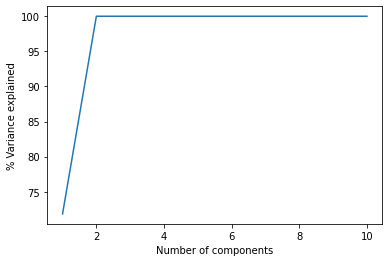

In [23]:
FindPrincipleComponents(ZomatoData,'Rating')